# Projeto
Este Dataframe foi retirado do Kaggle. Mostra algumas informações que podem estar relacionadas a um ataque cardíaco e se a pessoa tem ou não uma propensão em desenvolver o problema. O objetivo do projeto é classificar pessoas que podem ou não ter um ataque cardíaco.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Conhecendo o dataset


* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
<ol>
<li> Value 1: typical angina </li>
<li> Value 2: atypical angina </li>
<li> Value 3: non-anginal pain </li>
<li> Value 4: asymptomatic </li>
    </ol>
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
<ol>
<li> Value 0: normal </li>
<li> Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) </li>
<li> Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria </li>
    </ol>
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

In [45]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
df.shape

(303, 14)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [48]:
# procurando por valores nulos
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Gráficos

Text(0.5, 1.0, 'Tendência de desenvolver ataque cardíaco')

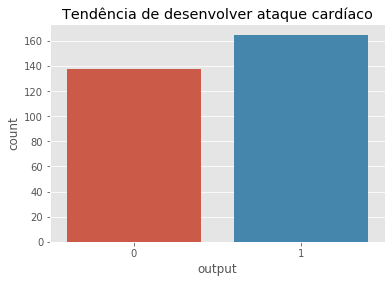

In [61]:
plt.style.use('ggplot')
sns.countplot(data = df, x = df.output).set_title('Tendência de desenvolver ataque cardíaco')


Text(0.5, 1.0, 'Tendência por sexo')

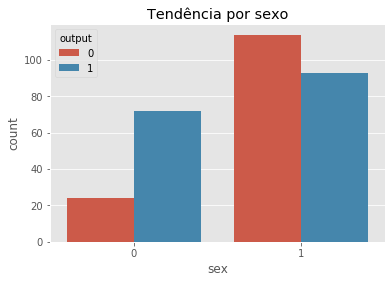

In [65]:
sns.countplot(data = df, x = df.sex, hue = 'output').set_title('Tendência por sexo')

Text(0.5, 1.0, 'Tipos de dor no peito')

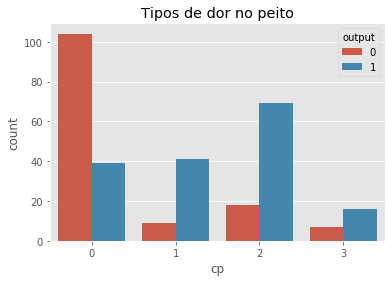

In [63]:
sns.countplot(data = df, x = 'cp', hue = 'output').set_title('Tipos de dor no peito')

Text(0.5, 1.0, 'Características ECG')

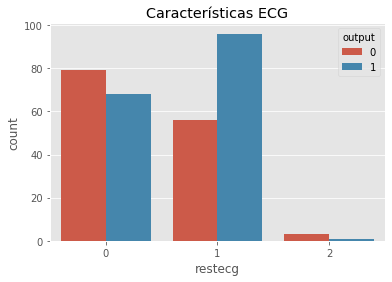

In [64]:
sns.countplot(data = df, x = 'restecg', hue = 'output').set_title('Características ECG')

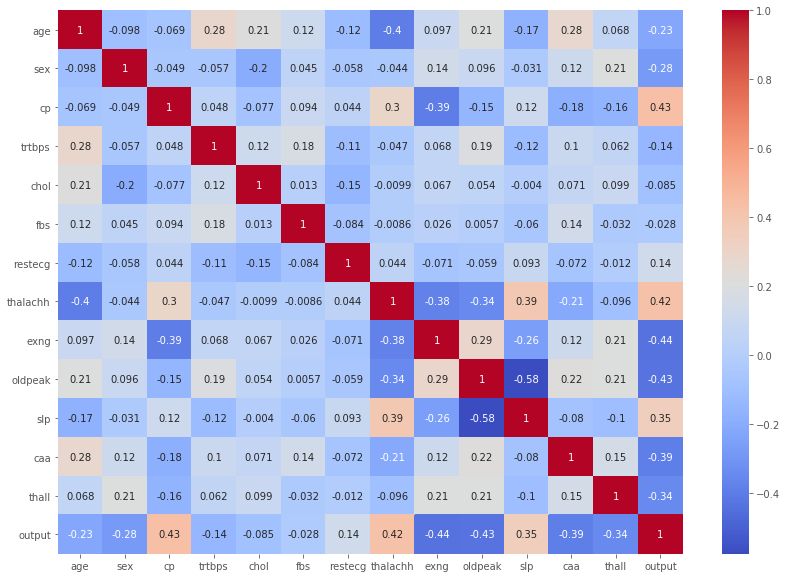

In [53]:
fig, ax = plt.subplots(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

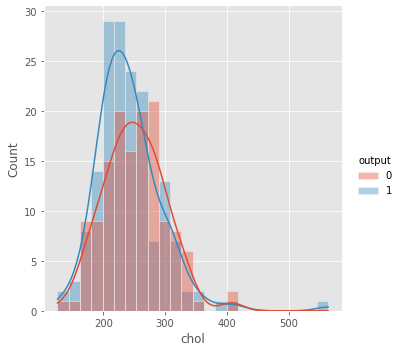

In [68]:
sns.displot(data = df,x = df['chol'],hue = df.output,kde = True, alpha = 0.4)
# Distribuição do nível do colesterol

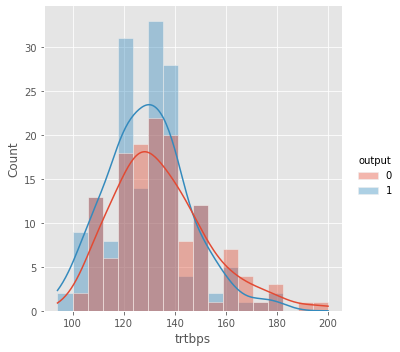

In [55]:
sns.displot(data = df,x = df['trtbps'],hue = df.output,kde = True, alpha = 0.4)
# Distribuição dos níveis de pressão sanguínea

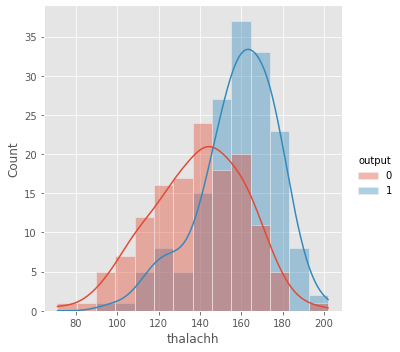

In [56]:
sns.displot(data = df, x = df['thalachh'], hue = df['output'], kde = True, alpha = 0.4)
# Taxa máxima de batidas alcançadas

### Criando classificador

In [14]:
# Separando coluna alvo das demais
y = df.output
df.drop('output', axis = 1,inplace = True)

In [15]:
# Colocando os dados na mesma escala
from sklearn.preprocessing import MinMaxScaler

MinMax = MinMaxScaler().fit(df)
df_minmax = MinMax.transform(df)

In [39]:
# Criação e tunning do modelo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parametros_grid = {'kernel':('linear', 'rbf'), 'C':[0.2,0.3,0.4,0.5,0.6]}
clf = svm.SVC()

grid = GridSearchCV(clf,parametros_grid, cv=10,scoring='accuracy')
grid.fit(df,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [40]:
# melhores parâmetros
grid.best_params_

{'C': 0.3, 'kernel': 'linear'}

In [41]:
# resultado de acurácia encontrado com os valores acima
grid.best_score_

0.8447311827956989